In [1]:
# Happiness
oecd_df = pd.read_csv('BLI_23112019114830785.csv')

for column in oecd_df.columns[:4]:
    print( '\n', column,  set(oecd_df[column].values) )
    
#print( set(tot_df1['Indicator'].values) )
#part_df1.sort_values(['Country'], inplace=True)
#part_df1.reset_index(drop=True, inplace=True)
#len(part_df1)


 LOCATION {'AUT', 'ESP', 'HUN', 'DEU', 'SVK', 'SVN', 'BEL', 'NZL', 'DNK', 'FRA', 'ISR', 'GRC', 'OECD', 'EST', 'PRT', 'USA', 'CHE', 'COL', 'NLD', 'AUS', 'CAN', 'GBR', 'FIN', 'ISL', 'MEX', 'LUX', 'LVA', 'BRA', 'POL', 'CZE', 'NOR', 'ITA', 'JPN', 'SWE', 'CHL', 'IRL', 'LTU', 'TUR', 'KOR', 'RUS', 'ZAF'}

 Country {'Chile', 'Lithuania', 'Denmark', 'Hungary', 'Luxembourg', 'Norway', 'Netherlands', 'Germany', 'New Zealand', 'United States', 'Iceland', 'Poland', 'Finland', 'Turkey', 'Korea', 'Latvia', 'Mexico', 'Israel', 'Slovenia', 'Estonia', 'South Africa', 'Ireland', 'France', 'Canada', 'Portugal', 'Czech Republic', 'Greece', 'Spain', 'Italy', 'Belgium', 'Austria', 'Sweden', 'Slovak Republic', 'Colombia', 'OECD - Total', 'Switzerland', 'Brazil', 'Russia', 'Australia', 'Japan', 'United Kingdom'}

 INDICATOR {'WL_EWLH', 'JE_PEARN', 'ES_EDUA', 'SC_SNTWS', 'CG_VOTO', 'HS_LEB', 'WL_TNOW', 'IW_HADI', 'PS_REPH', 'HO_BASE', 'JE_LMIS', 'JE_LTUR', 'HO_NUMR', 'HS_SFRH', 'JE_EMPL', 'IW_HNFW', 'ES_STCS',

In [17]:
var_1 = 'Life satisfaction'
var_2 = 'Homicide rate'
#var_2 = 'Personal earnings'

df1 = oecd_df.loc[ oecd_df['Indicator'] == var_1][['Country','Value']]
df1 = df1.groupby('Country').mean()
df2 = oecd_df.loc[ oecd_df['Indicator'] == var_2][['Country','Value']]
df2 = df2.groupby('Country').mean()

df1.reset_index(inplace=True)
df1.rename( columns={'Value' : var_1}, inplace=True)

df2.reset_index(inplace=True)
df2.rename( columns={'Value' : var_2}, inplace=True)

my_df = df1.merge(df2, on="Country", left_index=True, right_index=True)

In [18]:
weo_df = pd.read_csv('WEO_Data.csv')
for idx, row in my_df.iterrows():
    tmp_line = weo_df.loc[weo_df['Country'] == row['Country'] ] 
    if not tmp_line.empty:
        gdp = float(tmp_line['2015'].values[0].replace(',',''))
        my_df.loc[idx,'GDP'] = gdp

my_df.dropna(inplace=True)

In [19]:
from sklearn.linear_model import LinearRegression

import random

guess_country_idx = random.randint(0,40) # USA

In [20]:
X = np.c_[my_df['GDP']]
y = np.c_[my_df[var_1]]

In [21]:
X_train = X[:-1]
y_train = y[:-1]
X_test  = X[-1][0]
y_test  = y[-1][0]

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)
y_0 = model.predict(X_test)

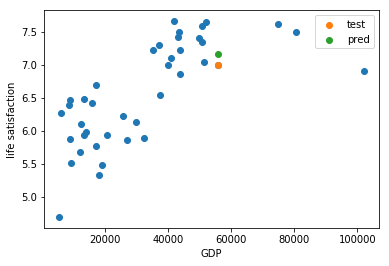

In [23]:
import  matplotlib.pyplot as plt

plt.scatter(X,y)
plt.scatter(X_test, y_test, label = 'test')
plt.scatter(X_test, y_0, label = 'pred')
plt.ylabel('life satisfaction')
plt.xlabel('GDP')
plt.legend()
plt.show()

In [24]:
## Introduce a new variable

X = np.c_[my_df[['GDP', var_2]]]

X_train = X[:-1]
X_test  = [X[-1]]

model = LinearRegression()
model.fit(X_train,y_train)
y_1 = model.predict(X_test)


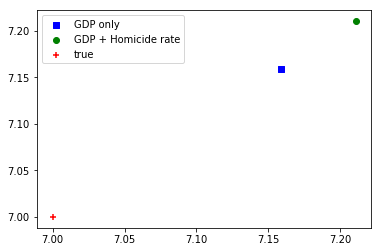

In [25]:
plt.scatter(y_0,y_0, color='b', marker = 's', label='GDP only')
plt.scatter(y_1,y_1, color='g', marker = 'o', label='GDP + {}'.format(var_2))
plt.scatter(y_test,y_test, color='r', marker = '+', label='true')

#plt.ylim([6.9,7.3])
#plt.xlim([6.9,7.3])
plt.legend()
plt.show()